In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=809b5d7daf539bb16393f73397285912cbe51e24afd007a3336930d70256dcc6
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  # replacing pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go

In [ ]:
# Import Customer Churn Dataset
dataset_path = '/content/Tel_Customer_Churn_Dataset.csv'  # Make sure this CSV file exists in the same folder
churn_dataset = pd.read_csv(dataset_path)

In [ ]:
# Number of Columns and Rows in the Dataset
print("Dataset shape:", churn_dataset.shape)

Dataset shape: (7043, 21)


In [ ]:
# Convert String values (Yes and No) of Churn column to 1 and 0
churn_dataset['Churn'] = churn_dataset['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
# Convert 'No internet service' to 'No' for selected columns
cols = ['OnlineBackup', 'StreamingMovies', 'DeviceProtection',
        'TechSupport', 'OnlineSecurity', 'StreamingTV']
for col in cols:
    churn_dataset[col] = churn_dataset[col].replace({'No internet service': 'No'})

In [ ]:
# Replace all the spaces with null values in 'TotalCharges'
churn_dataset['TotalCharges'] = churn_dataset['TotalCharges'].replace(" ", np.nan)

In [ ]:
# Drop null values of 'Total Charges' feature
churn_dataset = churn_dataset[churn_dataset["TotalCharges"].notnull()]
churn_dataset = churn_dataset.reset_index(drop=True)

In [ ]:
# Convert 'Total Charges' column values to float data type
churn_dataset["TotalCharges"] = churn_dataset["TotalCharges"].astype(float)

In [ ]:
# Check churn distribution
print("Churn Value Counts:\n", churn_dataset['Churn'].value_counts())

Churn Value Counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64


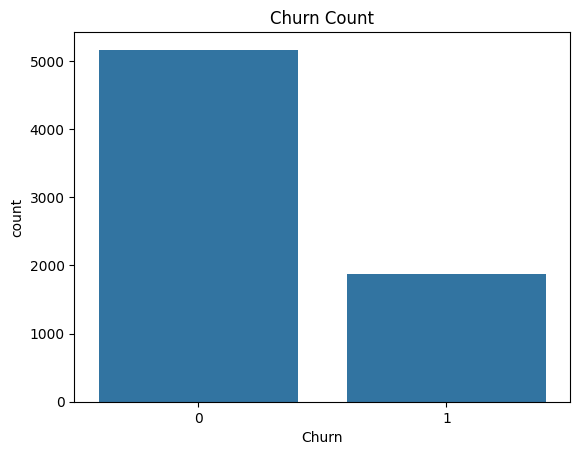

In [ ]:
# Plot churn count
sns.countplot(x='Churn', data=churn_dataset)
plt.title("Churn Count")
plt.show()

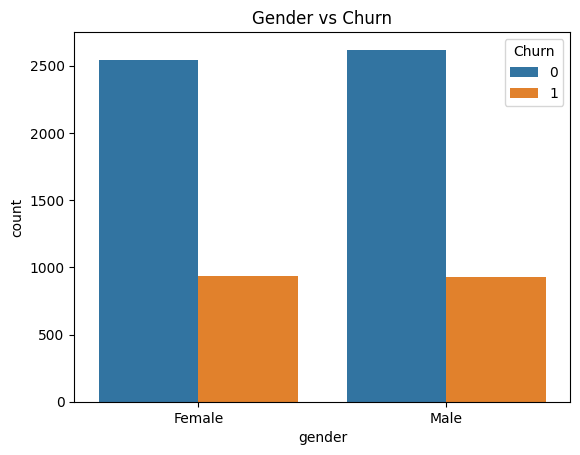

In [ ]:
# Gender vs Churn
sns.countplot(x='gender', hue='Churn', data=churn_dataset)
plt.title("Gender vs Churn")
plt.show()

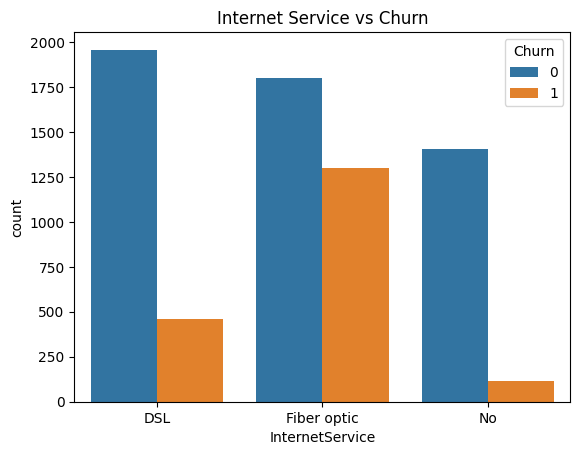

In [ ]:
# Internet Service vs Churn
sns.countplot(x='InternetService', hue='Churn', data=churn_dataset)
plt.title("Internet Service vs Churn")
plt.show()

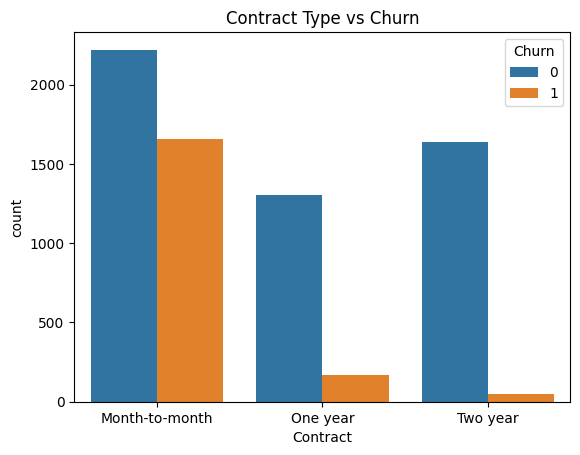

In [ ]:
# Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn', data=churn_dataset)
plt.title("Contract Type vs Churn")
plt.show()

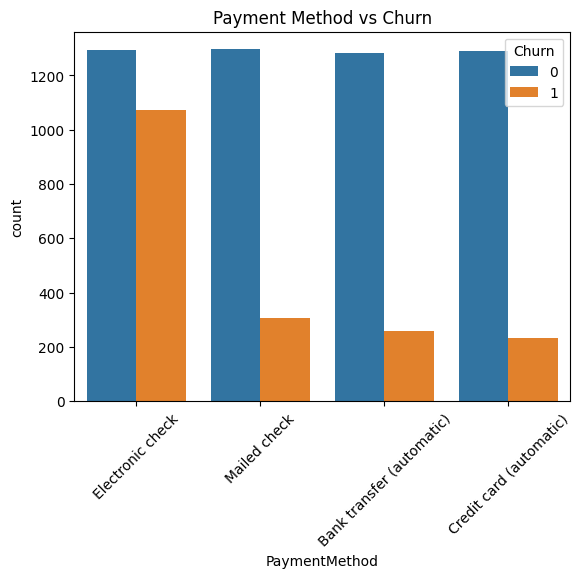

In [ ]:
# Payment Method vs Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=churn_dataset)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

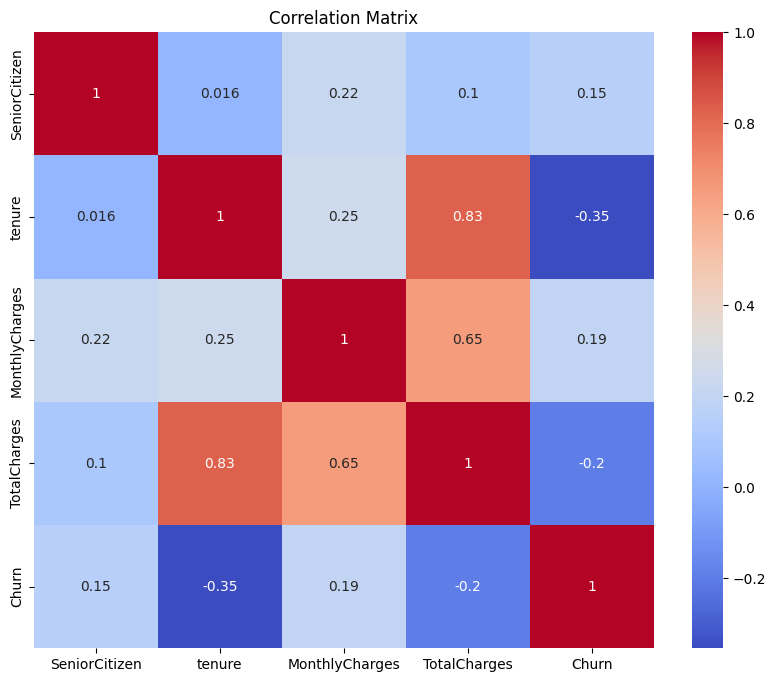

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(churn_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Convert categorical columns to numeric
churn_dataset = pd.get_dummies(churn_dataset, drop_first=True)

In [ ]:
# Split dataset
X = churn_dataset.drop('Churn', axis=1)
y = churn_dataset['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[948  85]
 [210 164]]


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7903340440653873


In [ ]:
new_customer = pd.DataFrame({
    'MonthlyCharges': [70],
    'TotalCharges': [200],
    'tenure': [3],
}, columns=X.columns)

prediction = model.predict(new_customer)
print("Will the customer churn?" , "Yes" if prediction[0] == 1 else "No")


Will the customer churn? No
